In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print("hello")

hello


In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.groupby(df["area_type"])["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1 = df.drop(["area_type",'society','balcony','availability'],axis=1)

In [9]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2 = df1.dropna()

In [12]:
df2["BHK"] = df2["size"].apply(lambda x : int(x.split(" ")[0]))

C:\Users\OMKARV~1\AppData\Local\Temp/ipykernel_22416/2584752967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BHK"] = df2["size"].apply(lambda x : int(x.split(" ")[0]))


In [13]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3 = df2.drop(["size"],axis=1)

In [15]:
df3

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [16]:
df3["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True        

In [19]:
df3[~df3["total_sqft"].apply(is_float)]

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [20]:
def transform(x):
    token = x.split("-")
    if(len(token)==2):
        return ((float(token[0]) + float(token[1]))/2) 
    try:
        return float(x)
    except:
        return None        

In [21]:
df3["total_sqft"] =df3["total_sqft"].apply(transform)

##  Feature Engineering and Dimensionality reduction


In [22]:
df3["price_per_sqr_ft"] = df3["price"]*100000/(df3["total_sqft"].apply(lambda x: float(x)))

In [23]:
len(df3["location"].unique())

1304

In [24]:
#to remove extra spaces in the column item
df3["location"] = df3["location"].apply(lambda x : x.strip())

In [25]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
#where the count is smaller then threshhold mentioning them as others
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df3.location.unique())

1293

In [28]:
df3["location"] = df3["location"].apply(lambda x: "other" if x in location_stats_less_then_10 else x)

In [29]:
len(df3.location.unique())


242

## Outlier Detection and Removal

#### We are going to remove those data which are  havin anomalies such as havin squareft per bedroom less then 300

In [30]:
df3[df3.total_sqft/df3.BHK<300]

,location,total_sqft,bath,price,BHK,price_per_sqr_ft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [31]:
len(df3[df3.total_sqft/df3.BHK<300])

744

In [32]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]

In [33]:
df4.shape

(12502, 6)

In [34]:
df4["price_per_sqr_ft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqr_ft, dtype: float64

In [35]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqr_ft)
        std = np.std(subdf.price_per_sqr_ft)
        reduceddf = subdf[(subdf.price_per_sqr_ft>(m-std)) & (subdf.price_per_sqr_ft<=(m+std))]
        df_out = pd.concat([df_out , reduceddf], ignore_index = True)
    return df_out    





In [36]:
df5 = remove_pps_outlier(df4)

In [37]:
df5.shape

(10241, 6)

In [38]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK== 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = "blue",label = "2bhk",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color = "green",marker="+",label = "3bhk",s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

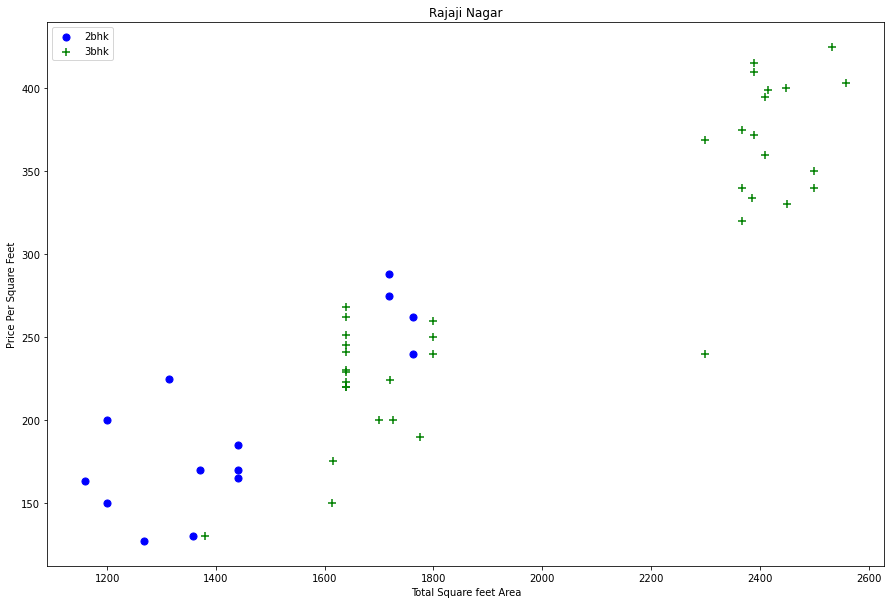

In [39]:
plot_scatter_chart(df5,"Rajaji Nagar")

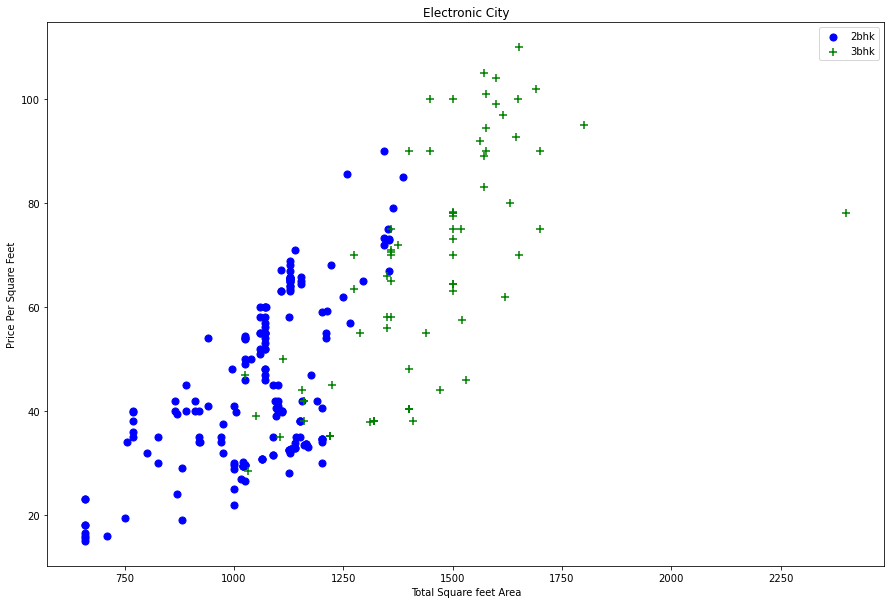

In [40]:
plot_scatter_chart(df5,"Electronic City")

In [41]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] ={
                'Mean':np.mean(bhk_df.price_per_sqr_ft),
                'std': np.std(bhk_df.price_per_sqr_ft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqr_ft<(stats['Mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outlier(df5)
df6.shape


(7329, 6)

In [42]:
df5

,location,total_sqft,bath,price,BHK,price_per_sqr_ft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,8130.081301
10237,other,812.0,1.0,26.00,1,3201.970443
10238,other,1440.0,2.0,63.93,3,4439.583333
10239,other,1075.0,2.0,48.00,2,4465.116279


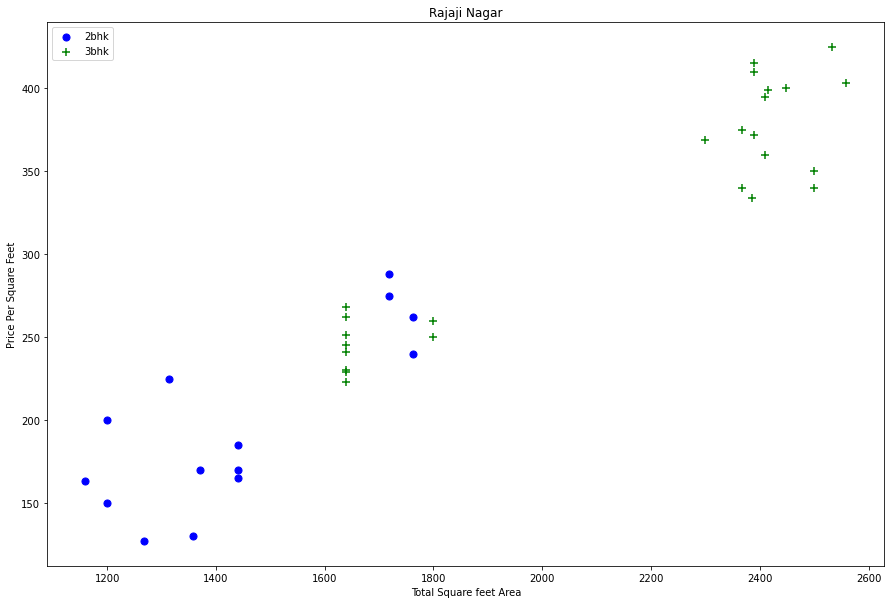

In [43]:
plot_scatter_chart(df6, "Rajaji Nagar")


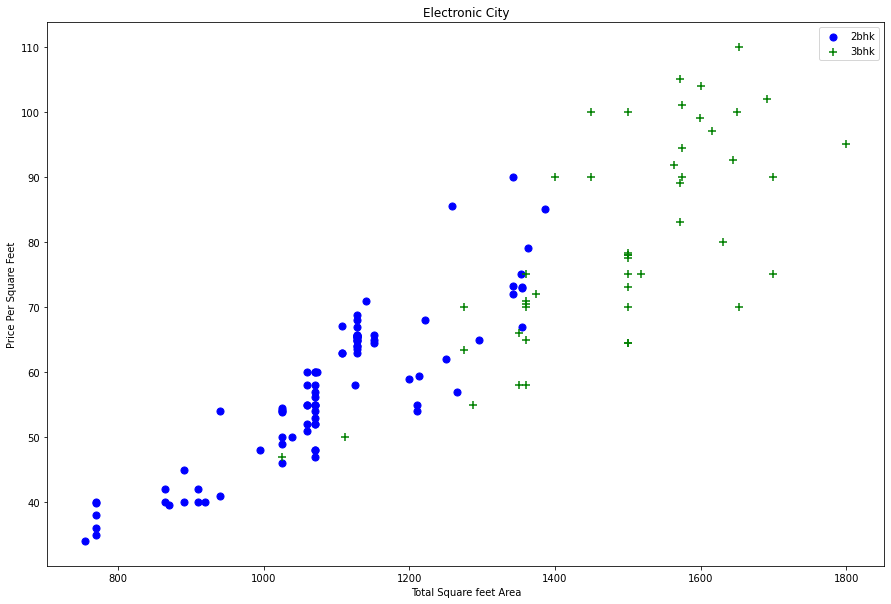

In [44]:
plot_scatter_chart(df6, "Electronic City")


Text(0, 0.5, 'count')

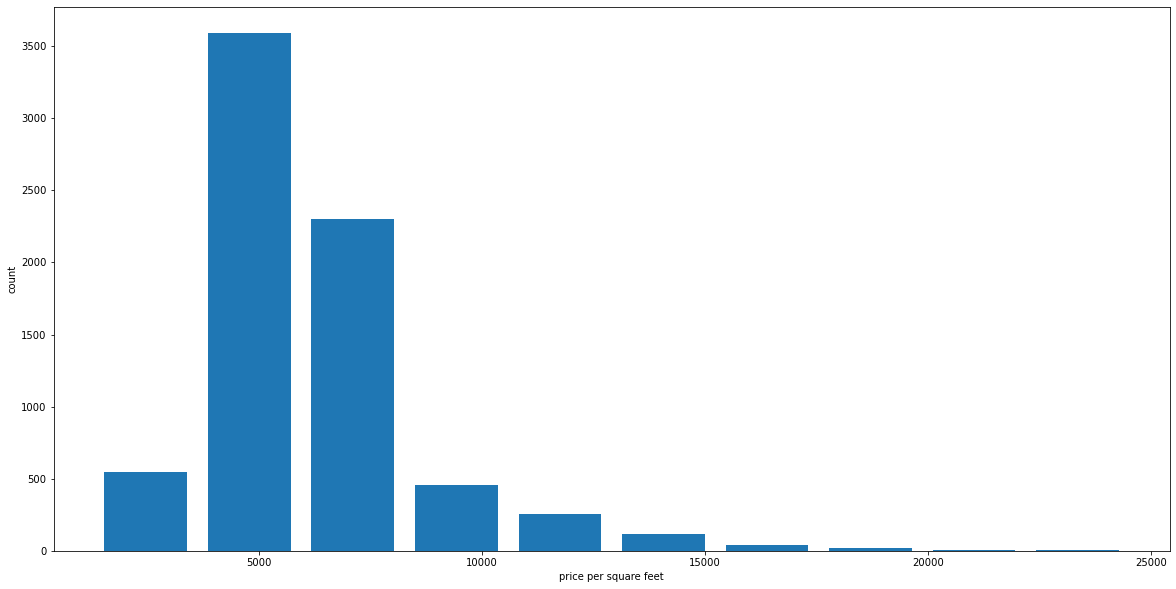

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)
plt.hist(df6.price_per_sqr_ft,rwidth= 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [46]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [47]:
df6[df6.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqr_ft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

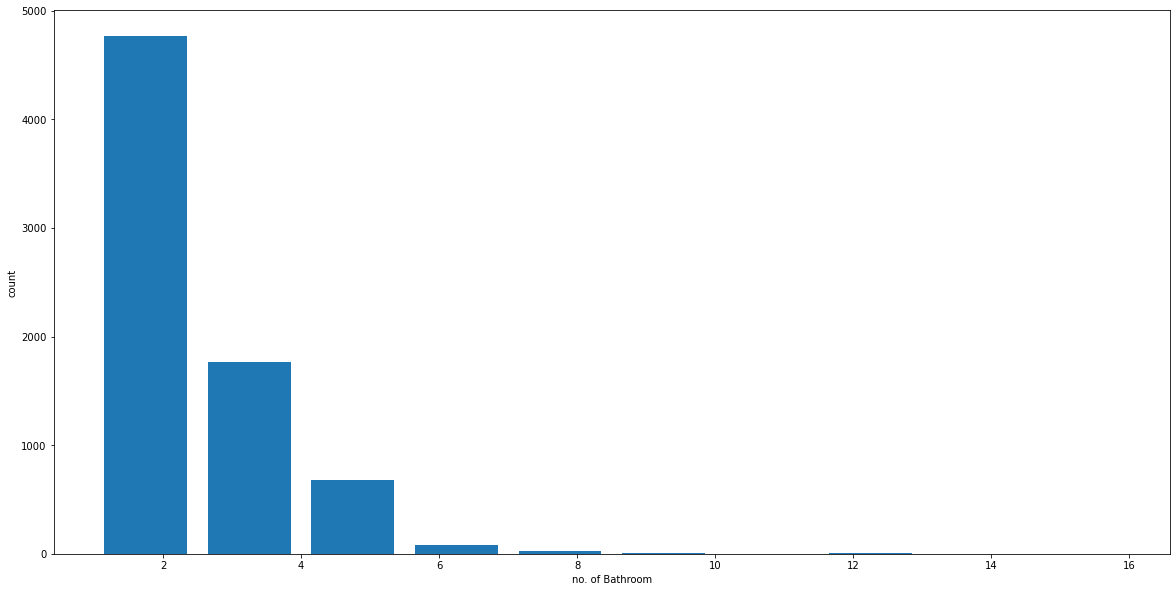

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel("no. of Bathroom")
plt.ylabel("count")


In [49]:
df7 = df6[df6.bath<df6.BHK+2]

In [50]:
df7.shape

(7251, 6)

In [51]:
df7

,location,total_sqft,bath,price,BHK,price_per_sqr_ft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


In [52]:
df8 = df7.drop(["price_per_sqr_ft"],axis=1)

## Building a Machine Learning Model

In [53]:
#converting categorical loction to numerical values
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df9 = pd.concat([df8,dummies],axis=1)
df9.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10 = df9.drop(["location"],axis=1)

In [56]:
x = df10.drop(["price"], axis=1)
x.head()


,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df10.price
y.head()


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697873565

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82362827, 0.77166234, 0.85089567, 0.80833638, 0.83653286])